<a id='Top'></a>
# <center>Module 2 Lecture Notes: Pandas and Working with Hydrographs</center>

<ul>
    <li><a href='#Pandas'>Module 2.0. Pandas</a></li>
    <li><a href='#Plotting'>Module 2.1. Plotting with Pandas</a></li>
    <li><a href='#DateTimes'>Module 2.2. DateTimes</a></li>
    <li><a href='#Application'>Module 2.3. Application</a></li>
</ul>



<a id='Pandas'></a>


# Module 2.0 Pandas

For the rest of the semester, we are going to start focussing on the tools available to solve the hydrogeologic issues that we discuss in class. Homework 3 (to be assigned this week) will focus on analyzing groundwater data from irrigated aquifers in Illinois.

To do this, we need to be able to do three main things in Python:

<ul>
    <li>Import large datasets</li>
    <li>Plot the data</li>
</ul>

For this, we are going to need to take advantage of the following libraries:

<ul>
    <li>Pandas Data Analysis Library</li>
    <li>Matplotlib</li>
</ul>

Let's import the libraries that we are going to use today. We will discuss them further as we introduce them.

In [1]:
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas

The Python Data Analysis Library, or Pandas, is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python.

https://pandas.pydata.org/

<img src = "https://d1o50x50snmhul.cloudfront.net/wp-content/uploads/2017/06/14111650/00000-00568744-800x533.jpg"/>

### Import Pandas

To import Pandas, we type:

`import pandas as pd`

pd is an alias used by most Python coders.

### Pandas as an Excel substitute

Pandas allows for much of the same functionality as Excel. Pandas has a data type called `DataFrame` that works on the same principle of rows and columns as excel. Each row has an index, and each column has a heading.

It is relatively simple to read an Excel file into Python with Pandas using the `pd.read_excel()` function. Similar in functionality, we can also read CSV files using `pd.read_csv()`. The output is a DataFrame.

In [12]:
# read a csv file from the ISWS website
# 'http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv'
df = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
df

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


As you can see above, all columns are imported into the DataFrame. If you want to work with a single column within a DataFrame, it is relatively simple using the format `DataFrame.ColumnName` or `DataFrame['ColumnName']`. Even still, the data has an index associated with it. This single set of data is referred to as a Series in Pandas.

In [10]:
#DataFrame[ColumnName]
df['head']

0        584.06
1        584.07
2        584.07
3        584.06
4        584.04
          ...  
53992    598.92
53993    598.92
53994    598.92
53995    598.92
53996    598.92
Name: head, Length: 53997, dtype: float64

Working at the ISWS, I have to present information to stakeholders in units of feet. This dataframe makes the mistake of not clearly labeling this. Let's change names of the DataFrame to address this. 

In [11]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
print(df)
df = df.rename(columns={"A": "a", "B": "c"})
print(df)

   A  B
0  1  4
1  2  5
2  3  6
   a  c
0  1  4
1  2  5
2  3  6


In [14]:
# change head to head_ft

# change depth_to_water_from_land_surface to dtw_ft

df = df.rename(columns={"RECORD": "record", "TIMESTAMP": "timestamp", "depth_to_water_from_land_surface": "dtw_ft", "head": "head_ft"})
df

,record,timestamp,dtw_ft,head_ft
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


# Finally, let's do some simple math

At the ISWS, we communicate with the public (and need to use feet/inches) and publish international research (where we need to use the metric system). It is critical to be able to do unit conversions, preferably in as few steps as possible.

If we were dealing with lists, we can use as a list comprehension, as you say in Module 1. However, with Pandas, it is even easier. You can conduct scalar multiplication on a single column of a DataFrame. Let's try it.

In [15]:
# convert head_ft and assign to a new column, head_m
df['head_m'] = df['head_ft']/3.28
df

,record,timestamp,dtw_ft,head_ft,head_m
0,0,2014-08-14 14:00:00,26.59,584.06,178.067073
1,1,2014-08-14 15:00:00,26.58,584.07,178.070122
2,2,2014-08-14 16:00:00,26.58,584.07,178.070122
3,3,2014-08-14 17:00:00,26.59,584.06,178.067073
4,4,2014-08-14 18:00:00,26.61,584.04,178.060976
...,...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92,182.597561
53993,67283,2020-11-20 11:00:00,11.73,598.92,182.597561
53994,67284,2020-11-20 12:00:00,11.73,598.92,182.597561
53995,67285,2020-11-20 13:00:00,11.73,598.92,182.597561


# Now you try

What is land surface elevation for the well we have been looking at? The calculation is actually easy. The head is the groundwater elevation above mean sea level. The depth to water is the groundwater elevation below land surface. Ergo, land surface elevation is the sum of depth to water and head. You can calculate this is a single line of code.

In [17]:
# try this one on your own
df['dtw_ft'][0]+df['head_ft'][0]

610.65

<a id='Plotting'></a>



# Module 2.1 Plotting Data with Pandas

The next major thing that we want to do is visualize this data in a hydrograph, just like we did with the northeastern Illinois data in Module 1. Plotting data with Pandas is generally easy, let's give it a try!

If you took a break after Module 2.0, go ahead and run this code block.

In [18]:
# import math
import math
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
wellhead

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


Before plotting, let's talk a little about indices. These are effectively your row numbers, or at least, that's how this example starts out. The indices are the values in the first column, and can be used to help reference your data. You can also extract just the indices using `DataFrame.Index`

In [20]:
#DataFrame.Index
wellhead.index

RangeIndex(start=0, stop=53997, step=1)

Plotting with a Pandas DataFrame or Series can be done by simpling using `DataFrame['columnname'].plot()`. When plotting this way, Python knows to plot the index on the x-axis and all other columns on the y-axis.

<AxesSubplot:>

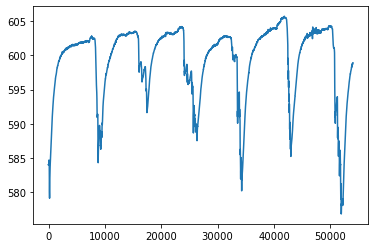

In [21]:
wellhead['head'].plot()

Neat. If you go to the original data, you will notice that this looks a lot like what is plotted. While a good start, we really want a useful x-axis. We don't really want to plot against the Index in this case, but rather the date and time. 

This short cut way of plotting with pandas (`DataFrame['columnname'].plot()`) is limiting, but we can try plotting like we did last week using matplotlib. 

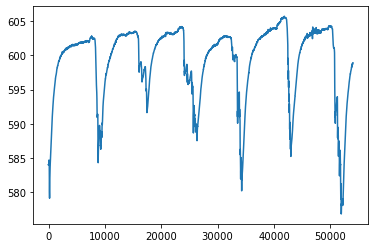

In [24]:
plt.plot(wellhead.index,wellhead['head'])

The code was slow doing it that way; something doesn't seem right here. Let's try the same thing, but using the index rather than TIMESTAMP, since we know that works. 

In [23]:
plt.plot(wellhead['TIMESTAMP'],wellhead['head'])

Error in callback <function flush_figures at 0x000001DBACB82940> (for post_execute):


KeyboardInterrupt: 

That worked, so we know we are doing some things correct, but Matplotlib is unhappy because the DateTime is a text string. Luckily, there is a little trick. Let's change the format of the date and time. Python/Pandas has a specific datatype for this called `Timestamp`. While this can get complicated to convert, this example is easy using the function `pd.to_datetime()`.

In [26]:
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


You'll notice that the output is very similar to what we have already seen. Pretty boring, right? Well, before anything else, let's just try plotting again. 

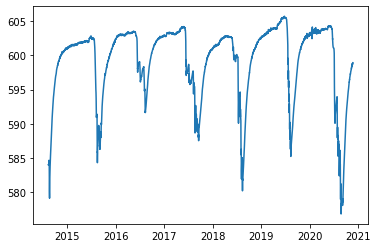

In [27]:
plt.plot(wellhead['TIMESTAMP'],wellhead['head'])

Oh, that was faster! You will also notice that the x-axis plots just years, but the values we fed in were years, months, day, hour, minutes, and seconds. How does Python/Pandas/Matplotlib know to do this? It is because our data is not a Timestamp object, and not a text string as before. 

In [28]:
#checking the type of the original TIMESTAMP
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
print(wellhead['TIMESTAMP'][0])
print(type(wellhead['TIMESTAMP'][0]))

2014-08-14 14:00:00
<class 'str'>


In [29]:
#checking the type of the converted TIMESTAMP to Timestamp
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
print(wellhead['TIMESTAMP'][0])
print(type(wellhead['TIMESTAMP'][0]))

2014-08-14 14:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


You will probably hear me slip up this semester and refer to the Timestamp object as a DateTime object; Timestamp is exclusive to Pandas but they are effectively the same thing. To read more, check out: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html.

# Now try it on your own

The well that we have been looking at, Henry 91C, is part of a monitoring network in the Green River Lowlands and is nested with a shallower well, Henry 91D. Go ahead and plot 91D up and compare with 91C. You can access the information here:

https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/green-river-lowlands-monitoring

                TIMESTAMP        GWE            method
0     1991-09-10 00:00:00  602.01000  Hand Measurement
1     1991-10-02 00:00:00  601.94000  Hand Measurement
2     1991-11-13 00:00:00  602.64000  Hand Measurement
3     1991-12-13 00:00:00  603.21000  Hand Measurement
4     1992-01-10 00:00:00  603.05000  Hand Measurement
...                   ...        ...               ...
56124 2021-02-10 17:00:00  603.25334        Transducer
56125 2021-02-10 18:00:00  603.25027        Transducer
56126 2021-02-10 19:00:00  603.24947        Transducer
56127 2021-02-10 20:00:00  603.24953        Transducer
56128 2021-02-10 21:00:00  603.24770        Transducer

[56129 rows x 3 columns]


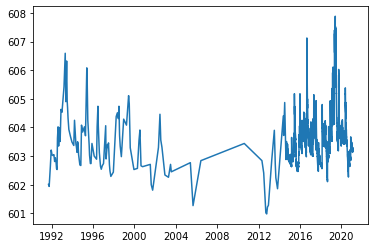

In [34]:
# write your code here
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381652.csv')
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
plt.plot(wellhead['TIMESTAMP'],wellhead['GWE'])
print(wellhead)

As part of your homework, you are going to need to investigate a few wells in the region and answer a few hydrogeologic questions. A good reference will be this report: https://www.ideals.illinois.edu/handle/2142/74884.

<a id='DateTimes'></a>



# Module 2.2 More Fun with TimeStamps 

When working with Pandas, we often want to assign a specific column to serve as our index. It is particularly useful to assign the time column to the index, as you will soon see. There are multiple ways to do this, but perhaps the easiest is to assign the index during the import of an Excel spreadsheet.

This is done by adding the argument `index_col = columnname` to the `pd.read_excel()` function.

Before going any further, make sure to import packages again if you have taken a break before starting this module.

In [35]:
# import math
import math
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# let's also import our data again
head_csv = 'http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv'
wellhead = pd.read_csv(head_csv)
# good idea to rename the columns to make them either briefer or to eliminate the potentially confusing "head", which is a Pandas term
wellhead = wellhead.rename(columns={"RECORD": "record", "TIMESTAMP": 'time', "depth_to_water_from_land_surface": "dtw_ft", "head": "head_ft"})
wellhead.time = pd.to_datetime(wellhead.time)
wellhead

,record,time,dtw_ft,head_ft
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


In [37]:
# change index to time
wellhead.index = wellhead['time']
wellhead

,record,time,dtw_ft,head_ft
time,,,,
2014-08-14 14:00:00,0,2014-08-14 14:00:00,26.59,584.06
2014-08-14 15:00:00,1,2014-08-14 15:00:00,26.58,584.07
2014-08-14 16:00:00,2,2014-08-14 16:00:00,26.58,584.07
2014-08-14 17:00:00,3,2014-08-14 17:00:00,26.59,584.06
2014-08-14 18:00:00,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
2020-11-20 10:00:00,67282,2020-11-20 10:00:00,11.73,598.92
2020-11-20 11:00:00,67283,2020-11-20 11:00:00,11.73,598.92
2020-11-20 12:00:00,67284,2020-11-20 12:00:00,11.73,598.92


### Plotting with Pandas

Now we can plot data using the shortcut in Pandas, or do it the classic way. Note that the two code blocks give the same result. 

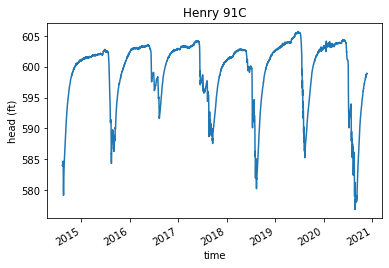

In [39]:
# plot a line at a time
wellhead['head_ft'].plot()
plt.title('Henry 91C')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

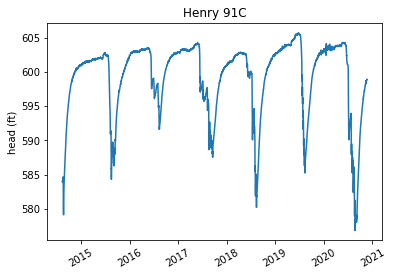

In [40]:
# plot a line at a time
plt.plot(wellhead.index,wellhead['head_ft'])
plt.title('Henry 91C')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

# So what?

Okay, swapping our timestamp/datetime to the index didn't gain us much for purposes of plotting. However, there is a powerful feature that we haven't discussed yet- sampling. Sometimes, you may not want to plot all data, but instead take an average over a period of time. This is called resampling or binning the data, and this can be done with the timestamp object with a single line of code!

In [41]:
# this code resamples the dataframe to an annual average water level
wellhead_yr = wellhead.resample('Y').mean()
print(wellhead_yr)

                  record     dtw_ft     head_ft
time                                           
2014-12-31   1665.500000  14.707761  595.942236
2015-12-31   7711.500000  11.298626  599.351369
2016-12-31  16376.000000   9.643949  601.006050
2017-12-31  37584.630543  11.516226  599.133774
2018-12-31  46354.995890  11.783628  598.866373
2019-12-31  55115.160064   9.457601  601.192396
2020-12-31  63369.422621  13.014673  597.635328


The mean over a year (`Y`) was taken in every column, which isn't meaningful for the record (which was a unique id that has no physical meaning), but is very helpful for the head. Data can be resampled over other time intervals as well, including `D` for day, `W` for week, and `M` for month. 

<AxesSubplot:xlabel='time'>

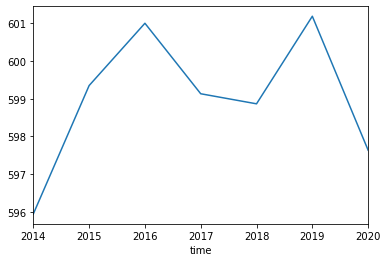

In [42]:
wellhead_yr['head_ft'].plot()

This tells us that the highest water levels occurred in 2016 and 2019; the lowest occurred in 2014 and 2020. In your homework, you are going to compare this to precipitation data in each year. I don't know what this will actually show; it could be interesting!

# Now try this on your own!

Try plotting up the maximum and minimum elevations observed in each year at Henry 91C.

            record                time  dtw_ft  head_ft
time                                                   
2014-12-31       0 2014-08-14 14:00:00    9.57   579.12
2015-12-31    3332 2015-01-01 00:00:00    7.85   584.31
2016-12-31   12092 2016-01-01 00:00:00    7.10   591.65
2017-12-31   20661 2017-01-01 00:00:00    6.43   587.53
2018-12-31   41974 2018-01-01 00:00:00    7.78   580.20
2019-12-31   50736 2019-01-01 00:00:00    4.92   585.23
2020-12-31   59496 2020-01-01 00:00:00    6.33   576.82


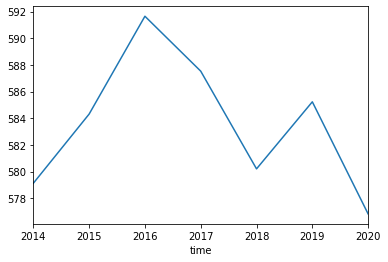

In [47]:
wellhead_yr = wellhead.resample('Y').min()
wellhead_yr['head_ft'].plot()
print(wellhead_yr)

Are you surprised that the mean, max, and min all show different trends? I'll leave it to you to think about what these results mean, and also whether any of these years are misleading. 

<a id='Application'></a>

# Module 2.3: Estimating Recharge

After a precipitation event, a portion of the water vertically infiltrates to the aquifer, known as recharge. Recharge is measured in the same units as precipitation (length per time, commonly inches per year).  

Employing hydrographs, we are going to use a simple hydrogeologic analysis known as the Water Table Fluctuation method. The concept is simple, changes in groundwater head <b>might</b> indicate a change in recharge, although other factors such as pumping or changes in stream levels could also be influencing this change. Let's not worry about that now.

The idea is to apply transient mass balance concepts to estimate recharge as follows:

$R=\frac{\Delta h S_y}{t}$

where $R$ is recharge ($ft/d$), $\Delta h$ is change in head ($ft$), $S_y$ is specific yield (unitless), and time is the interval over which the head change was observed ($d$). <b>Only positive recharge is generally considered</b>

Let's see how this looks on a data set from the ISWS for a monitoring well in Mason County, resampled to capture the water level every week.

In [48]:
# https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/imperial-valley
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead

,TIMESTAMP,GWE,method
TIMESTAMP,,,
1995-03-01 00:00:00,1995-03-01 00:00:00,479.43000,Hand Measurement
1995-04-01 00:00:00,1995-04-01 00:00:00,479.60000,Hand Measurement
1995-05-01 00:00:00,1995-05-01 00:00:00,479.89000,Hand Measurement
1995-06-01 00:00:00,1995-06-01 00:00:00,483.74000,Hand Measurement
1995-07-01 00:00:00,1995-07-01 00:00:00,483.80000,Hand Measurement
...,...,...,...
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer
2020-09-25 12:00:00,2020-09-25 12:00:00,477.14457,Transducer


A couple of notes on this. GWE is Groundwater Elevation, in feet above mean sea level. There is no depth to water, and the measurement method is included as well. You can see right away that the weekly measurements are originally taken by hand, but end with mostly transducer readings. The transducer (which measures water levels continuously) failed in late September of last year, but there is a hand measurement in December.

When we do a weekly resampling, you will notice some major changes to the structure of this DataFrame.

In [49]:
wellhead_w = wellhead.resample('W').mean()
print(wellhead_w)

               GWE
TIMESTAMP         
1995-03-05  479.43
1995-03-12     NaN
1995-03-19     NaN
1995-03-26     NaN
1995-04-02  479.60
...            ...
2020-11-08     NaN
2020-11-15     NaN
2020-11-22     NaN
2020-11-29     NaN
2020-12-06  476.78

[1345 rows x 1 columns]


We see a lot of NaN's. That simply represents weeks for which no data exists. However, we can still plot this data.

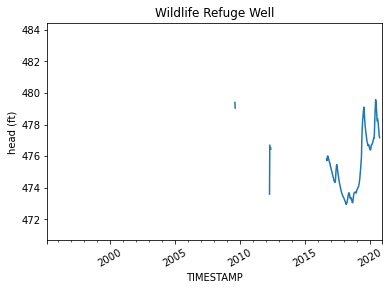

In [50]:
# plot a line at a time
wellhead_w.GWE.plot()
plt.title('Wildlife Refuge Well')
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

There is a lot of missing data that will prove problematic here. Instead, let's just use the transducer data. This brings up a new important concept- how to trim a dataframe based on a certain condition. In this case, we want a new dataframe that only includes tranducer data. This is relatively easy to do, and the code takes the following form:

In [51]:
# https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/imperial-valley
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead

,TIMESTAMP,GWE,method
TIMESTAMP,,,
1995-03-01 00:00:00,1995-03-01 00:00:00,479.43000,Hand Measurement
1995-04-01 00:00:00,1995-04-01 00:00:00,479.60000,Hand Measurement
1995-05-01 00:00:00,1995-05-01 00:00:00,479.89000,Hand Measurement
1995-06-01 00:00:00,1995-06-01 00:00:00,483.74000,Hand Measurement
1995-07-01 00:00:00,1995-07-01 00:00:00,483.80000,Hand Measurement
...,...,...,...
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer
2020-09-25 12:00:00,2020-09-25 12:00:00,477.14457,Transducer


In [53]:
wellhead2 = wellhead[wellhead['method']=='Transducer']
wellhead2

,TIMESTAMP,GWE,method
TIMESTAMP,,,
2016-08-24 10:00:00,2016-08-24 10:00:00,475.83576,Transducer
2016-08-24 11:00:00,2016-08-24 11:00:00,475.83372,Transducer
2016-08-24 12:00:00,2016-08-24 12:00:00,475.83812,Transducer
2016-08-24 13:00:00,2016-08-24 13:00:00,475.84197,Transducer
2016-08-24 14:00:00,2016-08-24 14:00:00,475.84347,Transducer
...,...,...,...
2020-09-22 15:00:00,2020-09-22 15:00:00,NaN,Transducer
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer


This syntax might take a little getting used to, but let's break it down. The code `wellhead['method']=='Transducer'` determines for each line in the dataframe where the relationship is true or false, and is accompanied by the index of the dataframe. 

In [57]:
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead['method']=='Transducer'

TIMESTAMP
1995-03-01 00:00:00    False
1995-04-01 00:00:00    False
1995-05-01 00:00:00    False
1995-06-01 00:00:00    False
1995-07-01 00:00:00    False
                       ...  
2020-09-22 16:00:00     True
2020-09-25 10:00:00     True
2020-09-25 12:00:00     True
2020-09-25 13:00:00     True
2020-12-01 11:02:00    False
Name: method, Length: 35168, dtype: bool

The following code takes this binary `True` and `False` output and selects from the dataframe only those lines where the condition is true. 

In [58]:
wellhead[wellhead['method']=='Transducer']

,TIMESTAMP,GWE,method
TIMESTAMP,,,
2016-08-24 10:00:00,2016-08-24 10:00:00,475.83576,Transducer
2016-08-24 11:00:00,2016-08-24 11:00:00,475.83372,Transducer
2016-08-24 12:00:00,2016-08-24 12:00:00,475.83812,Transducer
2016-08-24 13:00:00,2016-08-24 13:00:00,475.84197,Transducer
2016-08-24 14:00:00,2016-08-24 14:00:00,475.84347,Transducer
...,...,...,...
2020-09-22 15:00:00,2020-09-22 15:00:00,NaN,Transducer
2020-09-22 16:00:00,2020-09-22 16:00:00,NaN,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer


Similarly, we could create a dataframe where elevations are only greater than 476 ft using the following code:

In [59]:
wellhead[wellhead['GWE']>476]

,TIMESTAMP,GWE,method
TIMESTAMP,,,
1995-03-01 00:00:00,1995-03-01 00:00:00,479.43000,Hand Measurement
1995-04-01 00:00:00,1995-04-01 00:00:00,479.60000,Hand Measurement
1995-05-01 00:00:00,1995-05-01 00:00:00,479.89000,Hand Measurement
1995-06-01 00:00:00,1995-06-01 00:00:00,483.74000,Hand Measurement
1995-07-01 00:00:00,1995-07-01 00:00:00,483.80000,Hand Measurement
...,...,...,...
2020-09-22 13:00:00,2020-09-22 13:00:00,477.18900,Transducer
2020-09-25 10:00:00,2020-09-25 10:00:00,477.12691,Transducer
2020-09-25 12:00:00,2020-09-25 12:00:00,477.14457,Transducer


We've been experimenting a lot with this dataframe, so just to make sure, let's re-run our code in a single block, from importing data to resampling weekly. 

<AxesSubplot:xlabel='TIMESTAMP'>

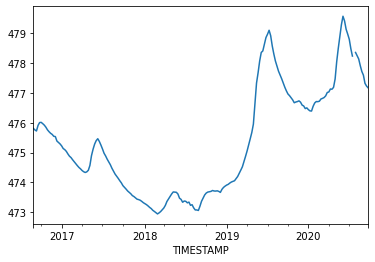

In [60]:
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']
wellhead_w = wellhead.resample('W').mean()
wellhead_w.GWE.plot()

### Calculating $\Delta h$

Now let's calculate the head differences between points in time. 

We need to calculate the difference in the average heads over each weekly interval. To do this, we simply take the difference between the head and the shifted head using the function `shift()`. 

In [61]:
print(wellhead_w)

                   GWE
TIMESTAMP             
2016-08-28  475.811092
2016-09-04  475.759444
2016-09-11  475.723483
2016-09-18  475.909658
2016-09-25  476.006363
...                ...
2020-08-30  477.717467
2020-09-06  477.593314
2020-09-13  477.318871
2020-09-20  477.228369
2020-09-27  477.168958

[214 rows x 1 columns]


In [63]:
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w

,GWE,deltah
TIMESTAMP,,
2016-08-28,475.811092,NaN
2016-09-04,475.759444,-0.051648
2016-09-11,475.723483,-0.035961
2016-09-18,475.909658,0.186175
2016-09-25,476.006363,0.096704
...,...,...
2020-08-30,477.717467,-0.195199
2020-09-06,477.593314,-0.124153
2020-09-13,477.318871,-0.274443


Okay, I intentionally tackled a few steps there, but we need to walk through that again. What is shift doing here? Let's take a closer look:

In [64]:
#here is the original data
wellhead_w['GWE']

TIMESTAMP
2016-08-28    475.811092
2016-09-04    475.759444
2016-09-11    475.723483
2016-09-18    475.909658
2016-09-25    476.006363
                 ...    
2020-08-30    477.717467
2020-09-06    477.593314
2020-09-13    477.318871
2020-09-20    477.228369
2020-09-27    477.168958
Freq: W-SUN, Name: GWE, Length: 214, dtype: float64

In [65]:
# and the shifted data
wellhead_w['GWE'].shift()

TIMESTAMP
2016-08-28           NaN
2016-09-04    475.811092
2016-09-11    475.759444
2016-09-18    475.723483
2016-09-25    475.909658
                 ...    
2020-08-30    477.912667
2020-09-06    477.717467
2020-09-13    477.593314
2020-09-20    477.318871
2020-09-27    477.228369
Freq: W-SUN, Name: GWE, Length: 214, dtype: float64

The index does not change, nor does the length. However, the first value has been pushed down by one, replaced with an NaN. NaN's are just Pandas/Pythons way of defining "Not a Number", we'll take care of that next. 

What are we really doing by shifting values? Well, if we subtract the two columns from one another, we are really taking the difference from the head in the previous day (given by the shifted value) and the head in the current day (given by the unshifted value). In other words, the difference on `2016-09-04` between the two is 475.76 (the actual head on that day) minus 475.81 (the head on the previous day). The head went down in this case, so the negative sign that is yielded by the difference makes sense.  

Scrolling back up, you can see that the value calculated as `delta h` for the first time interval is an `NaN`. Math is complicated when NaNs are present, as happens in the first delta_h. Let's fill that value with a float in by backfilling values (NaNs are set equal to the next value). 

In [66]:
wellhead_w = wellhead_w.fillna(method='bfill')
print(wellhead_w)

                   GWE    deltah
TIMESTAMP                       
2016-08-28  475.811092 -0.051648
2016-09-04  475.759444 -0.051648
2016-09-11  475.723483 -0.035961
2016-09-18  475.909658  0.186175
2016-09-25  476.006363  0.096704
...                ...       ...
2020-08-30  477.717467 -0.195199
2020-09-06  477.593314 -0.124153
2020-09-13  477.318871 -0.274443
2020-09-20  477.228369 -0.090502
2020-09-27  477.168958 -0.059411

[214 rows x 2 columns]


### Estimate recharge
Recall that our goal is to calculate recharge usig the Water Table Fluctuation method, which requires specific yield $S_y$ and time interval $\Delta t$. For simplicity, let's assume that $S_y$ is equal to 0.2 (we will see later if this actually makes sense) and a time interval of 7 days (consistent with our resampling of 1 week).

In [67]:
sy = 0.2
timeint = 7

wellhead_w['recharge'] = sy*wellhead_w['deltah']/timeint
print(wellhead_w)


                   GWE    deltah  recharge
TIMESTAMP                                 
2016-08-28  475.811092 -0.051648 -0.001476
2016-09-04  475.759444 -0.051648 -0.001476
2016-09-11  475.723483 -0.035961 -0.001027
2016-09-18  475.909658  0.186175  0.005319
2016-09-25  476.006363  0.096704  0.002763
...                ...       ...       ...
2020-08-30  477.717467 -0.195199 -0.005577
2020-09-06  477.593314 -0.124153 -0.003547
2020-09-13  477.318871 -0.274443 -0.007841
2020-09-20  477.228369 -0.090502 -0.002586
2020-09-27  477.168958 -0.059411 -0.001697

[214 rows x 3 columns]


So close, but there are a lot of negative recharge values here. The Water Table Fluctation method as defined by the USGS as only positive recharge values, negative values should be set to 0 recharge.

Here's a nifty little code that does this for you.

<AxesSubplot:xlabel='TIMESTAMP'>

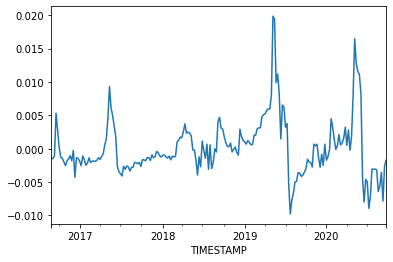

In [69]:
wellhead_w['recharge'].plot()

<AxesSubplot:xlabel='TIMESTAMP'>

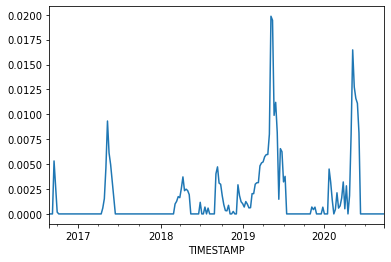

In [70]:
# Write a code that sets negative values equal to zero
wellhead_w[wellhead_w['recharge']<0]=0
wellhead_w['recharge'].plot()

### Plot head and recharge data

We want to observe the relationship between head changes and recharge. Let's plot both up. Note that we add a title based on the original url. 

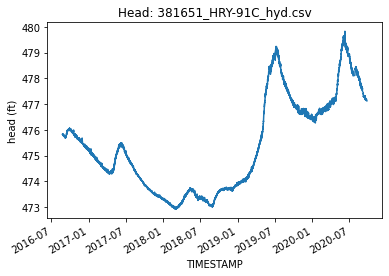

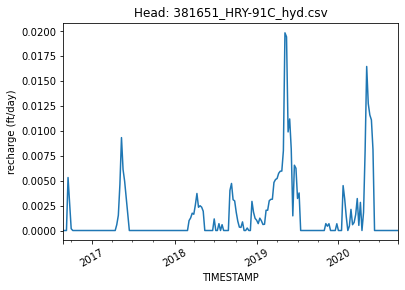

In [71]:
# plot a line at a time
wellhead.GWE.plot()
plt.title("Head: "+ head_csv[39:])
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.title("Head: "+ head_csv[39:])
wellhead_w.recharge.plot()
plt.ylabel('recharge (ft/day)')
plt.xticks(rotation = 30)
plt.show()


The above plots are difficult to compare because the curves aren't on the same line. Using a slightly more complicated code, we can plot both heads and recharge on the same plot using different y-axes. 

I'll post a supplemental video discussing the details of this code. For now, you should be able to copy, paste, and modify. 

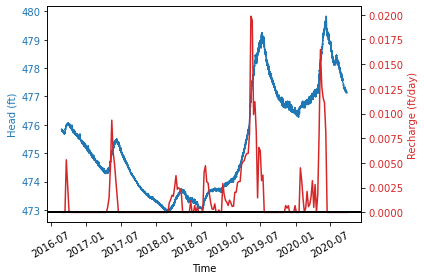

In [72]:
# Define a figure the primary axis
fig, ax1 = plt.subplots()

# There are a different set of functions/methods for defining properties of the primary axis. 
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Head (ft)', color=color)
ax1.plot(wellhead.GWE, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Recharge (ft/day)', color=color)  # we already handled the x-label with ax1
ax2.plot(wellhead_w.recharge, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(linewidth=2, color='k')



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## You now have everything you need to start on Module 2's Homework assignment.